# K-Means Clustering

### Personality and Culture
This dataset is a set of survey questions that measure the Big 5 personality traits (agreeableness, conscientiousness, extraversion, intellect, neuroticism) and Hofstede's six cultural dimentions (individualism/collectivism, indulgence/restraint, long-term orientation, femininity/masculinity, power distance, uncertainty avoidance). The surveys were taken by a cohort of 216 students entering an information systems program. The results were clustered into two groups and used to determine the team composition for the program. The first semester, students were placed into four-person teams with others in the same cluster (homogenous condition). The second semester, the students were placed into teams consisting of two members of each cluster (heterogeneous condition). This practice was proven to maximize student learning and confidence (Anderson et al., 2018; 2019).

1.   Anderson, Greg, et al. "The Effect of Software Team Personality Composition on Learning and Performance: Making the" Dream" Team." Proceedings of the 51st Hawaii international conference on system sciences. 2018.
2.   Anderson, Greg, et al. "Optimizing software team performance with cultural differences." (2019).

In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist

df = pd.read_csv('https://www.ishelp.info/data/personality.csv')
df.head()

,AGR1,AGR2,AGR3,AGR4,AGR5,CON1,CON2,CON3,CON4,CON5,...,CON,EXT,INT,NEU,IDV,IVR,LTO,MAS,PD,UAI
0,5,5,7,5,5,7,5,7,7,5,...,6.2,5.0,5.6,3.8,4.75,3.50,4.75,4.00,4.50,3.00
1,4,5,7,5,3,7,5,5,5,3,...,5.0,5.2,5.0,6.4,4.50,3.75,3.75,3.25,4.75,3.00
2,5,5,7,5,7,5,7,5,7,4,...,5.6,5.2,5.6,5.4,5.00,3.25,4.00,4.50,4.25,2.75
3,7,5,5,5,5,7,7,7,7,5,...,6.6,5.2,5.8,5.0,4.25,3.75,5.75,4.25,4.00,3.00
4,7,5,7,7,5,5,4,7,5,4,...,5.0,2.8,5.0,4.4,5.00,4.25,4.50,3.75,3.25,3.00


In [17]:
df = df[['AGR', 'CON', 'EXT', 'INT', 'NEU', 'IDV', 'IVR', 'LTO', 'MAS', 'PD', 'UAI']]
df.head()

,AGR,CON,EXT,INT,NEU,IDV,IVR,LTO,MAS,PD,UAI
0,5.4,6.2,5.0,5.6,3.8,4.75,3.50,4.75,4.00,4.50,3.00
1,4.8,5.0,5.2,5.0,6.4,4.50,3.75,3.75,3.25,4.75,3.00
2,5.8,5.6,5.2,5.6,5.4,5.00,3.25,4.00,4.50,4.25,2.75
3,5.4,6.6,5.2,5.8,5.0,4.25,3.75,5.75,4.25,4.00,3.00
4,6.2,5.0,2.8,5.0,4.4,5.00,4.25,4.50,3.75,3.25,3.00


## Determining the Optimal Number of Clusters

There are many metrics for determining the optimal number of clusters. The best one depends on the characteristics of the dataset. For brevity, we review three of them below. Choose the number represented by the majority of the criterion.

### Calinski and Harabasz Criterion
Max value is best

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

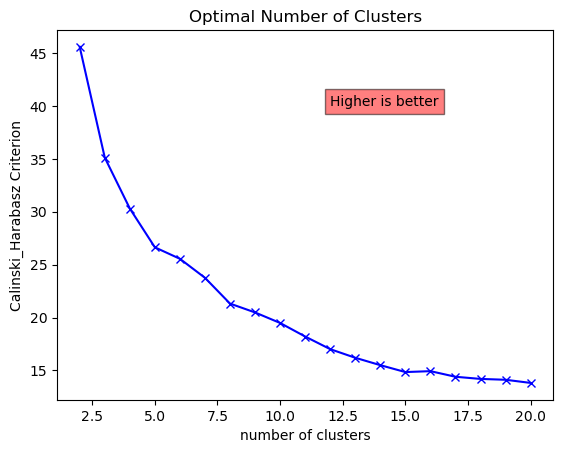

In [18]:
# Calinski and Harabasz Criterion
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

ch_score = []
for n in range(2, 21):
  kmeans = KMeans(n, random_state=12345).fit(df)
  ch_score.append(calinski_harabasz_score(df, labels=kmeans.labels_))

plt.plot(range(2, 21), ch_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Calinski_Harabasz Criterion') 
plt.title('Optimal Number of Clusters')
plt.text(12, 40, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

### Silhouette Analysis

Max value is best

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

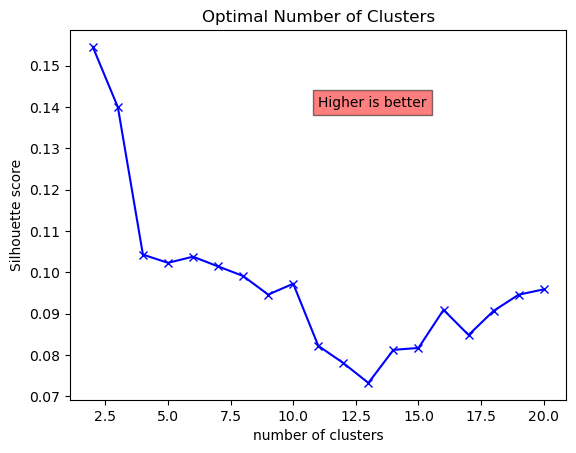

In [19]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

si_score = []
for n in range(2, 21):
 kmeans = KMeans(n, random_state=12345).fit(df)
 si_score.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In both cases, 2 clusters gives the highest (best) score

### WCSS Method (a.k.a. Elbow Method)

The elbow (i.e. slope=-1) is best

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

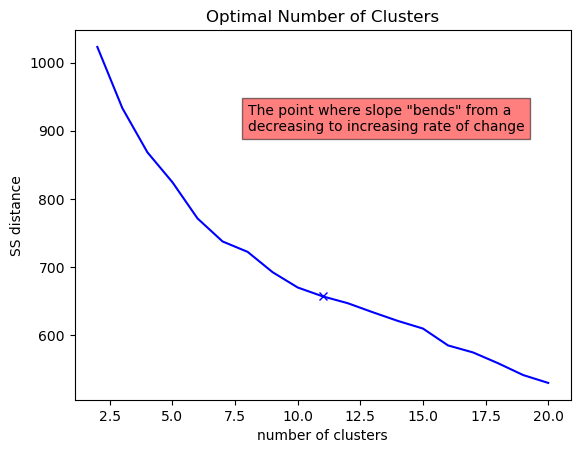

In [20]:
# WCSS: Elbow Method

ss_score = []
for n in range(2,21):
    kmeans = KMeans(n, random_state=12345).fit(df)
    ss_score.append(kmeans.inertia_)
    
# Where does the slope bend? Find the highest (least negative) slope.
changes = []
for n in range(2, 20):
  changes.append(float(ss_score[n - 1] - ss_score[n - 2]))

optimal_n = changes.index(max(changes))

plt.plot(range(2,21), ss_score, 'bx-', markevery=[optimal_n])
plt.xlabel('number of clusters')
plt.ylabel('SS distance')
plt.title('Optimal Number of Clusters')
plt.text(8, 900, 'The point where slope "bends" from a \ndecreasing to increasing rate of change', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

# Keep in mind that the y and x axes are on different scales. Thus, although the 
# bend appears to be around 7-10 clusters, it's actually at 19.

The three metrics for determining clusters are giving quite different results (2, 2, and 19). Since the first two agree that two clusters is best, I would use two if you want to keep your number of clusters down and 19 if you want many more clusters. I would not recommend using something in between. Let's continue with two clusters. 

## Final K-Means Model

In [21]:
# Train the model
kmeans = KMeans(2, random_state=12345).fit(df)

# Add assigned clusters to a new DataFrame
df_wcluster = df.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()

c:\Users\danli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,AGR,CON,EXT,INT,NEU,IDV,IVR,LTO,MAS,PD,UAI,cluster
0,5.4,6.2,5.0,5.6,3.8,4.75,3.50,4.75,4.00,4.50,3.00,0
1,4.8,5.0,5.2,5.0,6.4,4.50,3.75,3.75,3.25,4.75,3.00,1
2,5.8,5.6,5.2,5.6,5.4,5.00,3.25,4.00,4.50,4.25,2.75,1
3,5.4,6.6,5.2,5.8,5.0,4.25,3.75,5.75,4.25,4.00,3.00,1
4,6.2,5.0,2.8,5.0,4.4,5.00,4.25,4.50,3.75,3.25,3.00,0


In [22]:
# Which features played the largest role in determining clusters?

output_df = pd.DataFrame({'C0_means': df_wcluster[df_wcluster.cluster == 0].mean(), 'C1_means': df_wcluster[df_wcluster.cluster == 1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.drop(['cluster']).sort_values(by=['diff'], ascending=False)

,C0_means,C1_means,diff
EXT,4.047273,5.447170,1.399897
NEU,3.890909,4.900000,1.009091
AGR,5.614545,6.328302,0.713756
INT,4.672727,5.367925,0.695197
UAI,3.179545,2.974057,0.205489
LTO,4.540909,4.415094,0.125815
MAS,3.875000,3.818396,0.056604
PD,3.890909,3.926887,0.035978
IVR,3.875000,3.908019,0.033019
CON,5.512727,5.488679,0.024048


In [23]:
# Make cluster predictions for new data
prediction = kmeans.predict([[5.2, 3.4, 3, 1, 6, 5.9, 4.6, 2.7, 3.3, 5, 4]])[0]
print(f'Case with values AGR=5.2, CON=3.4, EXT=3, INT=1, NEU=6, IND=5.9, IVR=4.6, LTO=2.7, MAS=3.3, PD=5, UAI=4 predicted to be in cluster: {prediction}')

Case with values AGR=5.2, CON=3.4, EXT=3, INT=1, NEU=6, IND=5.9, IVR=4.6, LTO=2.7, MAS=3.3, PD=5, UAI=4 predicted to be in cluster: 0


c:\Users\danli\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [24]:
# Create 3D Scatterplot to visualize cluster

fig = px.scatter_3d(df_wcluster, x='EXT', y='NEU', z='INT', color='cluster', size_max=20, opacity=1.0)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# Insurance Data
The data used above was very simple because it was complete numeric and every feature was on the same scale. However, k-means has significant problems if those two assumptions are not true. For example, the insurance dataset has both numeric and categorical features. In addition, the charges feature is on a very large scale (1000 to 60000) compared to sex and smoker (0 and 1). Therefore, we will use a different distance measure (Gower) and clustering algorithm (DBSCAN) which are optimized for this context.

In [25]:
df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Distance Measure: Gower Distance
The Gower distance is ideal (over Euclidean distance) when there are mixed data types. The gower package does not require that categorical data are converted to dummy codes nor that the data are standardized first. It takes care of all of that and generates a matrix (as opposed to a table) indicating the overall distance between all pairs of rows

In [26]:
!pip install gower

In [27]:
df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
import gower
distance_matrix = gower.gower_matrix(df)
pd.DataFrame(distance_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
0,0.000000,0.517377,0.590194,0.503644,0.502396,0.361219,0.439140,0.449843,0.572927,0.448411,...,0.381970,0.501423,0.478876,0.190303,0.408105,0.636688,0.337742,0.358004,0.191063,0.305737
1,0.517377,0.000000,0.097369,0.306735,0.238584,0.247295,0.245938,0.437708,0.256251,0.537217,...,0.413633,0.315192,0.348272,0.351919,0.512542,0.330378,0.322491,0.183484,0.354878,0.671263
2,0.590194,0.097369,0.000000,0.323652,0.258157,0.267371,0.266237,0.340338,0.216025,0.554133,...,0.404462,0.280884,0.308046,0.402966,0.421091,0.233008,0.411751,0.280854,0.426407,0.688179
3,0.503644,0.306735,0.323652,0.000000,0.068152,0.345155,0.427257,0.293872,0.275329,0.254579,...,0.380693,0.346683,0.450389,0.383388,0.539078,0.196233,0.412815,0.433077,0.380429,0.413454
4,0.502396,0.238584,0.258157,0.068152,0.000000,0.301139,0.385263,0.256267,0.224970,0.298633,...,0.430950,0.314196,0.452546,0.346837,0.511547,0.165002,0.344664,0.364925,0.335952,0.434140


In [29]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(metric="precomputed", linkage="average").fit(distance_matrix)
df['agg_cluster'] = agg.labels_
df.head()

,age,sex,bmi,children,smoker,region,charges,agg_cluster
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [30]:
df.agg_cluster.value_counts()

agg_cluster
1    1064
0     274
Name: count, dtype: int64

In [31]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Notice that the cluster counts align closely with *smoker*. Therefore, smoker can be removed from the clustering assignments.

In [32]:
distance_matrix = gower.gower_matrix(df[['age', 'sex', 'bmi', 'children', 'region', 'charges']])
agg = AgglomerativeClustering(metric="precomputed", linkage="average").fit(distance_matrix)
df['agg_cluster_no_smoker'] = agg.labels_
df.head()

,age,sex,bmi,children,smoker,region,charges,agg_cluster,agg_cluster_no_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [33]:
df.agg_cluster_no_smoker.value_counts()

agg_cluster_no_smoker
0    823
1    515
Name: count, dtype: int64